In [33]:
# problem 6 2024
# https://theofil.web.cern.ch/courses/compPhysics/files/2024/compPhysics_exercises_2024_2025.pdf
import numpy as np
import matplotlib.pyplot as plt

In [35]:
U = np.random.rand
σ = 2
def f(x): return (x/σ**2)*np.exp(-0.5*x**2/σ**2)
fmax = f(2) # from analysis (solving df/dt = 0)
def F(x): return 1 - np.exp(-0.5*x**2/σ**2)
#def Finv(x): return (-2*σ*σ*np.log(1-x))**0.5 
def Finv(x): return (-2*σ*σ*np.log(x))**0.5   # equivalent for RNG, because 1 - x ~ x if x ~ Unif(0,1) 

In [19]:
# x = np.linspace(0, 10, 21)
# y = f(x)
# plt.plot(x, y)

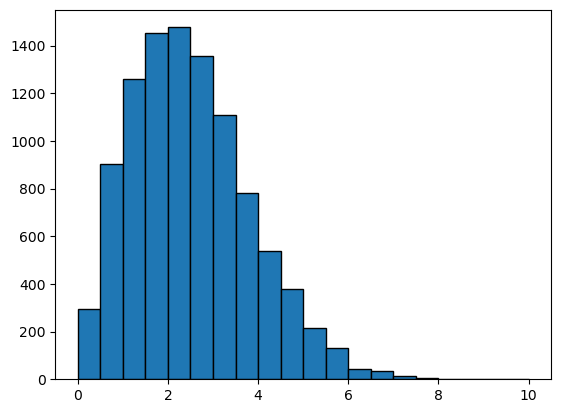

In [21]:
N = 10000
Xs = [ Finv(U()) for i in range(N) ] # alternatively with a for loop
hist, bins, patches = plt.hist(Xs, bins = np.linspace(0, 10, 21), ec = 'black')

In [23]:
hist[1]

902.0

In [26]:
(F(1) - F(0.5))*N

867.3633189174867

In [27]:
# waves in [3, 5]
goodwaves = 0
for wave in Xs:
    if 3 < wave < 5 : goodwaves += 1
print('frac = ', goodwaves/float(N))        

frac =  0.281


In [28]:
# expected waves in [3,5]
F(5) - F(3)

0.2807155337349423

(array([106., 284., 410., 489., 478., 428., 347., 284., 184., 111.,  62.,
         42.,  26.,  13.,   2.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

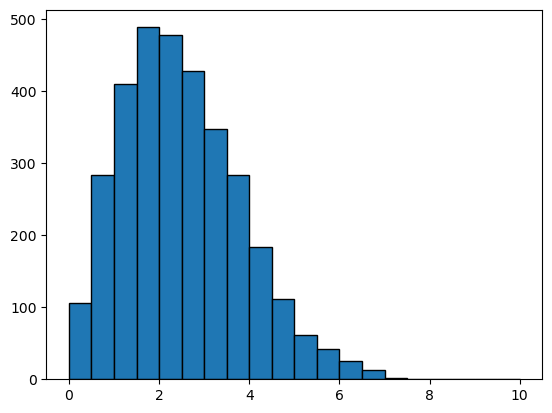

In [29]:
# hit or miss 
hits = []
for i in range(N):
    x = 10*U()
    y = fmax*U()
    if y <= f(x) : hits += [x]

plt.hist(hits, bins = np.linspace(0, 10, 21), ec = 'black')

In [31]:
eff = len(hits)/float(N)
print('eff = ', eff)

# expected efficiency

print('expectex eff = ', (F(10)-F(0))/(fmax*10))

eff =  0.3266
expectex eff =  0.329743025297555


In [32]:
# comment from the class: the instructions were asking to compare the number
# of random variables used in the two methods, for the same output of waves.
# With the inverse transorm, if we use N randoms we get N waves, it's 100% efficient
# With hits or miss we need 2*N/0.3297 random Us in order to get about ~10000 randoms
# It's 6 times more expensive
2/0.3297

6.066120715802245

# Deriving the CDF and Inverse CDF of the Rayleigh Distribution

The Rayleigh distribution describes the distribution of the magnitude of a vector with Gaussian-distributed components. The probability density function (PDF) of the Rayleigh distribution for a given scale parameter $ \sigma $ is:

$$
f(x; \sigma) = \frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}}, \quad x \geq 0
$$


To find the cumulative distribution function $ F(x) $, we integrate the PDF from 0 to $ x $:

$$
F(x; \sigma) = \int_{0}^{x} f(t; \sigma) \, dt
$$

Substitute $ f(t; \sigma) $:

$$
F(x; \sigma) = \int_{0}^{x} \frac{t}{\sigma^2} e^{-\frac{t^2}{2\sigma^2}} \, dt
$$

To solve this integral, we use the substitution $ u = \frac{t^2}{2\sigma^2} $, which gives $ du = \frac{t}{\sigma^2} \, dt $.

Rewriting the integral in terms of $ w $:

$$
F(x; \sigma) = \int_{0}^{\frac{x^2}{2\sigma^2}} e^{-w} \, dw
$$

Now, integrate \( e^{-w} \):

$$
F(x; \sigma) = \left[-e^{-w}\right]_{0}^{\frac{x^2}{2\sigma^2}}
$$

Evaluating this expression:

$$
F(x; \sigma) = 1 - e^{-\frac{x^2}{2\sigma^2}}
$$

Thus, the CDF of the Rayleigh distribution is:

$$
F(x; \sigma) = 1 - e^{-\frac{x^2}{2\sigma^2}}, \quad x \geq 0
$$

The inverse CDF, also called the quantile function, is found by solving $ F(x) = u $ for $ x $:

1. Set $ F(x) = u $:

   $$
   u = 1 - e^{-\frac{x^2}{2\sigma^2}}
   $$

2. Rearrange to isolate the exponential term:

   $$
   e^{-\frac{x^2}{2\sigma^2}} = 1 - u
   $$

3. Take the natural logarithm of both sides:

   $$
   -\frac{x^2}{2\sigma^2} = \ln(1 - u)
   $$

4. Solve for $ x $:

   $$
   x = \sigma \sqrt{-2 \ln(1 - u)}
   $$

Thus, the inverse CDF (quantile function) is:

$$
F^{-1}(u; \sigma) = \sigma \sqrt{-2 \ln(1 - u)}, \quad 0 \leq u < 1
$$